<div>
    <h1 align="center">Optimizing Results</h1></h1>
    <h1 align="center">Ensembling & Comparative Method</h1>
    <h3 align="center">Tabular Playground Series - Feb 2021</h3>
</div>

<div class="alert alert-success">  
</div>

# Description:


### - In this notebook, I used the results of my notebook and the results of twenty public notebooks. These results have been used for "Ensembling" and "Comparative Method". Thanks to everyone who shared their notebook, the addresses of some of the used notebooks are as follows:

https://www.kaggle.com/awwalmalhi/extreme-fine-tuning-lgbm-using-7-step-training

https://www.kaggle.com/hiro5299834/tps-feb-2021-with-single-lgbm-tuned

https://www.kaggle.com/craigmthomas/tps-feb-2021-lgb-xgb-combo

https://www.kaggle.com/andreshg/tps-feb-a-complete-study

https://www.kaggle.com/rmiperrier/step-by-step-lgb-optimization

https://www.kaggle.com/tunguz/tps-feb-2021-with-lgbmregressor

https://www.kaggle.com/ttahara/tps-feb-2021-3gbdts-ensemble-baseline

### - More information about the "Comparative Method" can be found at the following addresses:

https://www.kaggle.com/c/tabular-playground-series-jan-2021/discussion/213093

https://www.kaggle.com/somayyehgholami/0-69470-results-driven-january-tabular-301

https://www.kaggle.com/somayyehgholami/results-driven-tabular-playground-series-201

### - You can definitely mix your notebook results with the results of this notebook and get better results. You can also get better results by changing the hyperparameters of this notebook.

### >>> Good Luck <<<


<div class="alert alert-success">  
</div>

# If you find this work useful, please don't forget upvoting :)

<div class="alert alert-success">  
</div>

# Import & Data Set

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

# _______________________________________

# Kernels Data (Public Score & File Path)

dfk = pd.DataFrame({ 
    'Kernel ID': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U'],  
    'Score':     [ 0.84362, 0.84358, 0.84352, 0.84318, 0.84310, 0.84303, 0.84266, 0.84251, 0.84245, 0.84243, 0.84233, 0.84229, 0.84221, 0.84220, 0.84209, 0.84207, 0.84202, 0.84200, 0.84199, 0.84198, 0.84193],   
    'File Path': ['../input/feb84362/FEB84362.csv', '../input/feb84358/FEB84358.csv', '../input/feb84352/FEB84352.csv', '../input/feb84318/FEB84318.csv', '../input/feb84310/FEB84310.csv', '../input/feb84303/FEB84303.csv', '../input/feb84266/FEB84266.csv', '../input/feb84251/FEB84251.csv', '../input/feb84245/FEB84245.csv', '../input/feb84243/FEB84243.csv', '../input/feb84233/FEB84233.csv' , '../input/feb84229/FEB84229.csv', '../input/feb84221/FEB84221.csv', '../input/feb84220/FEB84220.csv', '../input/feb84209/FEB84209.csv', '../input/feb84207/FEB84207.csv', '../input/feb84202/FEB84202.csv', '../input/feb84200/FEB84200.csv', '../input/feb84199/FEB84199.csv', '../input/feb84198/FEB84198.csv', '../input/feb84193/FEB84193.csv']     
})    
    
dfk      

,Kernel ID,Score,File Path
0,A,0.84362,../input/feb84362/FEB84362.csv
1,B,0.84358,../input/feb84358/FEB84358.csv
2,C,0.84352,../input/feb84352/FEB84352.csv
3,D,0.84318,../input/feb84318/FEB84318.csv
4,E,0.84310,../input/feb84310/FEB84310.csv
5,F,0.84303,../input/feb84303/FEB84303.csv
6,G,0.84266,../input/feb84266/FEB84266.csv
7,H,0.84251,../input/feb84251/FEB84251.csv
8,I,0.84245,../input/feb84245/FEB84245.csv
9,J,0.84243,../input/feb84243/FEB84243.csv


<div class="alert alert-success">  
</div>

# Functions:

In [2]:
def generate(main, support, coeff):
    
    g = main.copy()    
    for i in main.columns[1:]:
        
        res = []
        lm, Is = [], []        
        lm = main[i].tolist()
        ls = support[i].tolist()  
        
        for j in range(len(main)):
            res.append((lm[j] * coeff) + (ls[j] * (1.- coeff)))            
        g[i] = res
        
    return g


In [3]:
def drawing(main, support, generated):
    
    X  = main.iloc[:, 1]
    Y1 = support.iloc[:, 1]
    Y2 = generated.iloc[:, 1]
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nOn the X axis >>> main\nOn the Y axis >>> support\n')           
    plt.scatter(X, Y1, s=0.1)
    plt.show() 
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nOn the X axis >>> main\nOn the Y axis >>> generated\n')           
    plt.scatter(X, Y2, s=0.1)
    plt.show()     
    

In [4]:
def drawing1(main, support, generated):
    
    X  = main.iloc[:, 1]
    Y1 = support.iloc[:, 1]
    Y2 = generated.iloc[:, 1]
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nBlue | X axis >> main | Y axis >> support\n\nOrange | X axis >> main | Y axis >> generated\n') 
    
    plt.scatter(X, Y1, s=0.1)    
    plt.scatter(X, Y2, s=0.1)
    
    plt.show() 
    

In [5]:
def drawing2(pxy, mxy):
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nComparative Method\n\nBlue | X(main) | Y(average - smaller result)\n\nOrange | X(main) | Y(generated)\n') 
    plt.scatter(pxy[0], pxy[1], s=0.1)
    plt.scatter(pxy[0], pxy[2], s=0.1)
    plt.show() 

    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nComparative Method\n\nBlue | X(main) | Y(average - bigger results)\n\nOrange | X(main) | Y(generated)\n') 
    plt.scatter(mxy[0], mxy[1], s=0.1)
    plt.scatter(mxy[0], mxy[2], s=0.1)
    plt.show()
    

In [6]:
def comparison(main, majority, pcoeff, mcoeff):
    '''
    majority: Must be greater than half the total number of kernels. 
              In this example it must be greater than ten.(Hyper parameter)
    
    pcoeff:   Hyper parameter
    mcoeff:   Hyper parameter
    '''    
    comp = main.copy()
    for i in main.columns[1:]:
        res = []
        pxy = [[],[],[]]
        mxy = [[],[],[]]        
        lm  = main[i].tolist() 
        ls  = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        for n in range (20):       
            csv   = pd.read_csv(dfk.iloc[n, 2])  
            ls[n] = csv[i].tolist() 
            
        for j in range(len(main)):
            pcount = 0
            pvalue = 0.0        
            mcount = 0
            mvalue = 0.0 
    
            for k in range (20):            
                if lm[j] > ls[k][j]:
                    pcount += 1
                    pvalue += ls[k][j]                 
                else: 
                    mcount += 1
                    mvalue += ls[k][j] 
                    
            if (pcount > majority): 
                res.append(lm[j] * pcoeff)
                pxy[2].append(lm[j] * pcoeff)                
                pxy[1].append(pvalue / pcount)
                pxy[0].append(lm[j])
                        
            elif (mcount > majority): 
                res.append(lm[j] * mcoeff)
                mxy[2].append(lm[j] * mcoeff)                
                mxy[1].append(mvalue / mcount)
                mxy[0].append(lm[j])
                        
            else: 
                res.append(lm[j])       
    
        comp[i] = res    

    drawing2(pxy, mxy)    
    return comp
    

<div class="alert alert-success">  
</div>

## Step #1
In this step, we use the results of kernels "A, B, C, D, E, F".

In [7]:
support = pd.read_csv(dfk.iloc[0, 2])
    
for k in range (1, 6):
    main = pd.read_csv(dfk.iloc[k, 2])
    support = generate(main, support, 0.60)
    
sub1 = support 

## Result: 
[ A: (Score: 0.84362), ... , F: (Score: 0.84303) ] >>> sub1: (Score: **0.84251**)

sub1(Last Support)    | Score: 0.84251


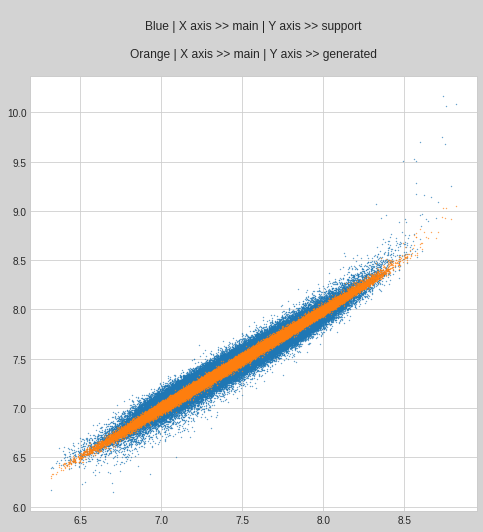

,id,target
count,200000.000000,200000.000000
mean,249970.884580,7.456835
std,144169.245904,0.276144
min,0.000000,6.291517
25%,125316.750000,7.273246
50%,249997.000000,7.453902
75%,374649.750000,7.636799
max,499995.000000,9.051080


In [8]:
print('sub1(Last Support)    | Score: 0.84251')

a = pd.read_csv(dfk.iloc[0, 2])

f = pd.read_csv(dfk.iloc[5, 2])

drawing1(f, a, sub1)

sub1.describe()

<div class="alert alert-success">  
</div>

## Step #2
In this step, we use the results of kernels "G, H, I, J, K, L, M, N".

In [9]:
support = sub1
    
for k in range (6, 14):
    main = pd.read_csv(dfk.iloc[k, 2])
    support = generate(main, support, 0.50)
    
sub2 = support 

## Result: 
[ sub1: (Score: 0.84251), G: (Score: 0.84266), ... , N: (Score: 0.84220) ] >>> sub2: (Score: **0.84211**)

sub2(Last Support)    | Score: 0.84211


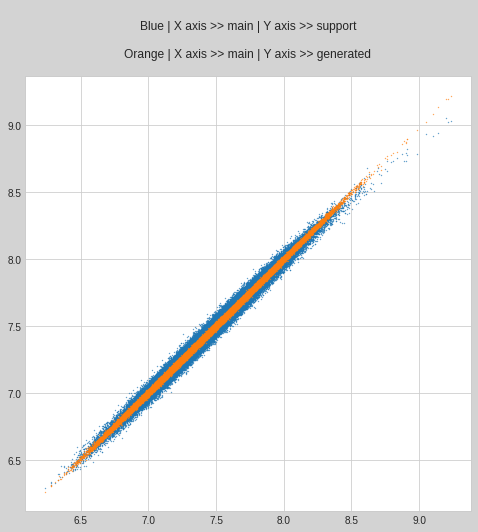

,id,target
count,200000.000000,200000.000000
mean,249970.884580,7.456343
std,144169.245904,0.274725
min,0.000000,6.263415
25%,125316.750000,7.275060
50%,249997.000000,7.452287
75%,374649.750000,7.632756
max,499995.000000,9.214550


In [10]:
print('sub2(Last Support)    | Score: 0.84211')

n = pd.read_csv(dfk.iloc[13, 2])

drawing1(n, sub1, sub2)

sub2.describe()

<div class="alert alert-success">  
</div>

## Step #3
In this step, we use the results of kernels "O, P, Q, R, S, T".

In [11]:
support = sub2
    
for k in range (14, 20):
    main = pd.read_csv(dfk.iloc[k, 2])
    support = generate(main, support, 0.40)
    
sub3 = support 

## Result:

[ sub2: (Score: 0.84211), O: (Score: 0.84209), ... , T: (Score: 0.84198) ] >>> sub3: (Score: 0.84195)

sub3(Last Support)    | Score: 0.84195


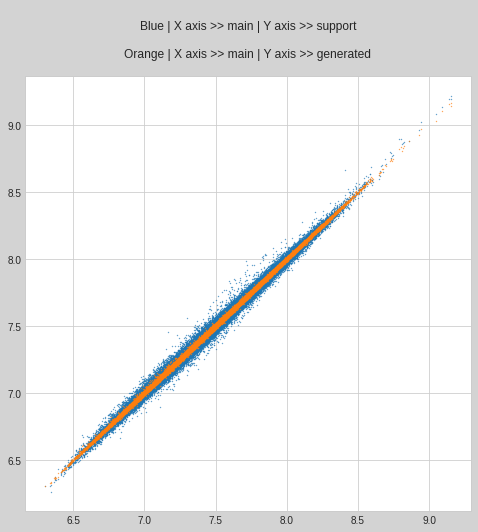

,id,target
count,200000.000000,200000.000000
mean,249970.884580,7.456352
std,144169.245904,0.273921
min,0.000000,6.304458
25%,125316.750000,7.275329
50%,249997.000000,7.452768
75%,374649.750000,7.632758
max,499995.000000,9.166607


In [12]:
print('sub3(Last Support)    | Score: 0.84195')

t = pd.read_csv(dfk.iloc[19, 2])

drawing1(t, sub2, sub3)

sub3.describe()

<div class="alert alert-success">  
</div>

## Step #4
Use the results of the "U" kernel as well as the results of step #3.

In [13]:
main = pd.read_csv(dfk.iloc[20, 2])

sub4 = generate(main, sub3, 0.60)

## Result:

[ U: (Score: 0.84193) , sub3: (Score: 0.84195) ] >>> sub4: (Score: 0.84191)

sub4    | Score: 0.84191


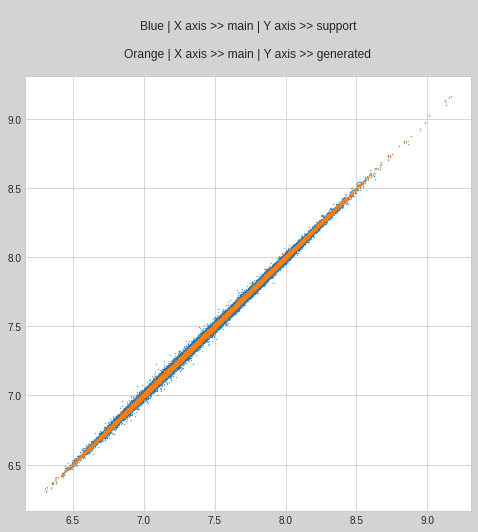

,id,target
count,200000.000000,200000.000000
mean,249970.884580,7.456370
std,144169.245904,0.275487
min,0.000000,6.308808
25%,125316.750000,7.274169
50%,249997.000000,7.453193
75%,374649.750000,7.634110
max,499995.000000,9.166137


In [14]:
print('sub4    | Score: 0.84191')

drawing1(main, sub3, sub4)

sub4.describe()

<div class="alert alert-success">  
</div>

## Step #5
## Comparative Method
In this step, we so-called recover some of the results of the previous step. That is, we compensate for the bad effects of the previous stages.

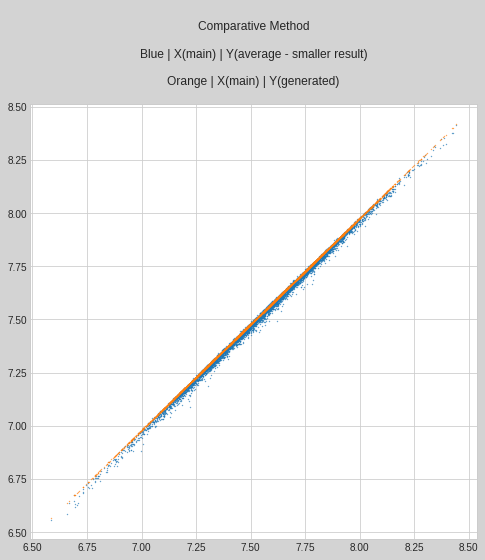

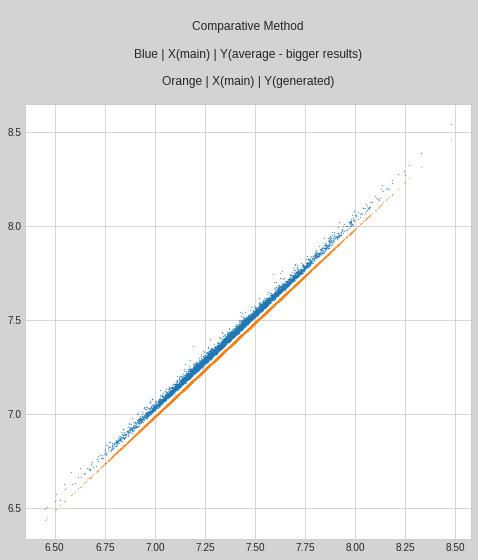

In [15]:
sub5 = comparison(sub4, 18, 0.9970, 0.9980)


## Result:

sub4: (Score: 0.84191)  >>>  sub5: (Score: **0.84188**)

In [16]:
print('sub5    | Score: 0.84188')
sub5.describe()

sub5    | Score: 0.84188


,id,target
count,200000.000000,200000.000000
mean,249970.884580,7.455204
std,144169.245904,0.275417
min,0.000000,6.308808
25%,125316.750000,7.272900
50%,249997.000000,7.452006
75%,374649.750000,7.632924
max,499995.000000,9.166137


<div class="alert alert-success">  
</div>

In [17]:
sub = sub5
sub.to_csv("submission.csv", index=False)

sub1.to_csv("submission1.csv", index=False)
sub2.to_csv("submission2.csv", index=False)
sub3.to_csv("submission3.csv", index=False)
sub4.to_csv("submission4.csv", index=False)
sub5.to_csv("submission5.csv", index=False)

!ls

__notebook__.ipynb  submission1.csv  submission3.csv  submission5.csv
submission.csv	    submission2.csv  submission4.csv


<div class="alert alert-success">  
</div>